# Analysis of $\lambda$ Window Spacing for MIF180

In [2]:
import a3fe as a3 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault
import seaborn as sns
import pickle as pkl
from typing import List, Tuple, Dict, Callable, Union
from scipy import stats
import numpy as np
from a3fe.read._process_somd_files import read_overlap_mat
import matplotlib.colors as colors
import BioSimSpace as BSS
rcParams.update(rcParamsDefault)
plt.style.use("seaborn-v0_8-colorblind")
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
%matplotlib inline

INFO:rdkit:Enabling RDKit 2024.03.3 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


## Notebook Layout

- Equilibration analysis
- Error analysis
- Overlaps analysis

## Equilibration

In [3]:
with open("final_analysis/final_dGs_30.pkl", "rb") as f:
    final_dgs_30 = pkl.load(f)

In [7]:
labels = ["$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
          "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
          "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
          "$\Delta \lambda = 4.0$ kcal mol$^{-1}$"]

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_862168/1471257951.py:1: SyntaxWarning: invalid escape sequence '\D'
  labels = ["$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1471257951.py:2: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1471257951.py:3: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1471257951.py:4: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 4.0$ kcal mol$^{-1}$"]


In [8]:
def plot_dg_conv(data, final_dg, final_ci):
    fig, ax = plt.subplots(figsize=(6, 5))
    for i, (times, dgs) in enumerate(data):
        # Select a single colour for each simulation runner. Get these from the default colourmap for seaborn-colorblind
        colors = sns.color_palette("colorblind", 4)
        #colors = plt.cm.get_cmap("tab10").colors
        color = colors[i]
        # For each of the replicates, plot the convergence data
        #for j in range(dgs.shape[0]):
            #ax.plot(times, dgs[j], color=color, alpha=0.5, linestyle="dashed")
        # Add the mean and 95 % CI
        y_avg = np.mean(dgs, axis=0)
        y_err = stats.t.interval(
            0.95, len(dgs) - 1, loc=y_avg, scale=stats.sem(dgs, axis=0)
        )
        ax.plot(
            times,
            y_avg,
            label=labels[i],
            color=color,
            linewidth=2,
        )
        ax.fill_between(
            times,
            y_err[0],
            y_err[1],
            alpha=0.2,
            color=color,
        )

    # Add dotted lines for the final value and 95 % CI
    ax.axhline(final_dg, color="k", linestyle="dotted", label="Final $\Delta G$")
    # Use thinner dotted line for the CI
    ax.axhline(final_dg + final_ci, color="k", linestyle="dotted", alpha=0.5)
    ax.axhline(final_dg - final_ci, color="k", linestyle="dotted", alpha=0.5)

    ax.set_xlabel("Cumulative Total Sampling Time / ns")
    ax.set_ylabel(r"$\Delta G$ / kcal mol$^{-1}$")
    ax.legend(loc="best")

    return fig, ax

<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_862168/377745981.py:32: SyntaxWarning: invalid escape sequence '\D'
  ax.axhline(final_dg, color="k", linestyle="dotted", label="Final $\Delta G$")


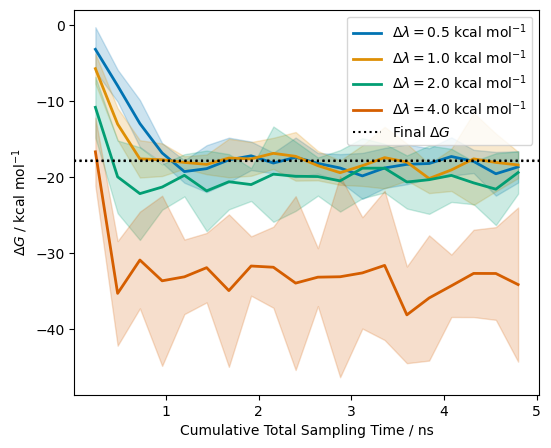

In [9]:
# Plot the convergence data for free vanish at short times
with open("final_analysis/mif_free_vanish_conv_002_with_4.pkl", "rb") as f:
    free_vanish_short_data = pkl.load(f)
    
fig, ax = plot_dg_conv(free_vanish_short_data, *final_dgs_30["MIF"]["LegType.FREE"]["StageType.VANISH"])
fig.savefig("final_analysis/free_vanish_short_conv.png", bbox_inches="tight", dpi=300)

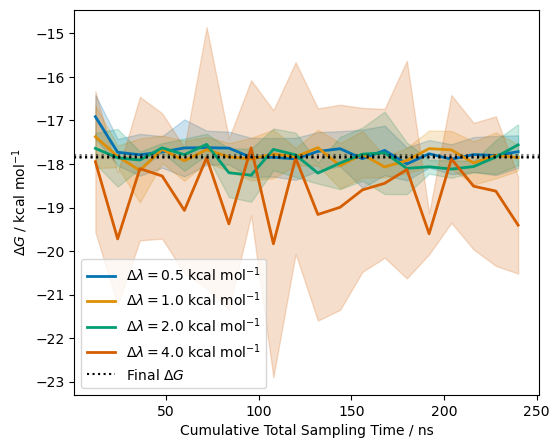

In [10]:
# Plot the convergence data for free vanish at short times
with open("final_analysis/mif_free_vanish_conv_with_4.pkl", "rb") as f:
    free_vanish_data = pkl.load(f)
    
fig, ax = plot_dg_conv(free_vanish_data, *final_dgs_30["MIF"]["LegType.FREE"]["StageType.VANISH"])
fig.savefig("final_analysis/free_vanish_conv.png", bbox_inches="tight", dpi=300)

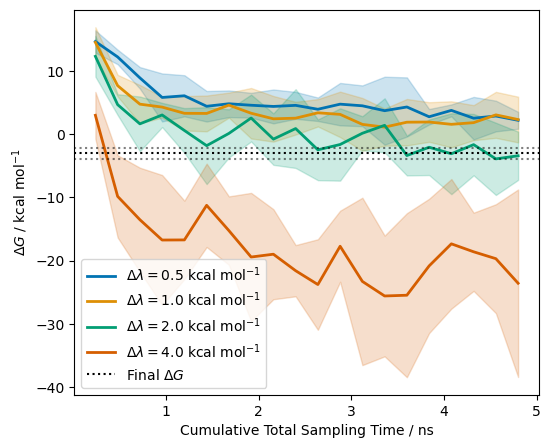

In [11]:
# Plot the convergence data for free vanish at short times
with open("final_analysis/mif_bound_vanish_conv_002_with_4.pkl", "rb") as f:
    free_bound_vanish_conv_short = pkl.load(f)
    
fig, ax = plot_dg_conv(free_bound_vanish_conv_short, *final_dgs_30["MIF"]["LegType.BOUND"]["StageType.VANISH"])
fig.savefig("final_analysis/bound_vanish_short_conv.png", bbox_inches="tight", dpi=300)

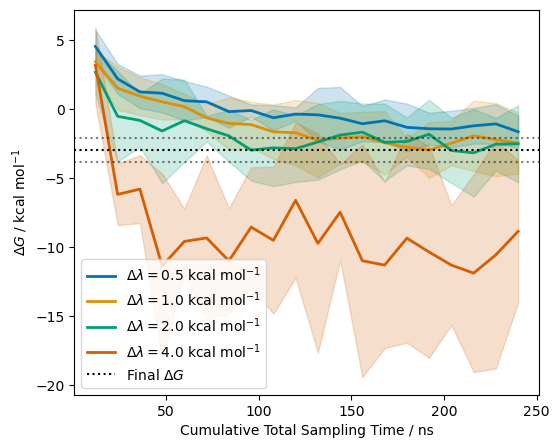

In [12]:
# Plot the convergence data for free vanish at short times
with open("final_analysis/mif_bound_vanish_conv_with_4.pkl", "rb") as f:
    free_bound_vanish_conv= pkl.load(f)
    
fig, ax = plot_dg_conv(free_bound_vanish_conv, *final_dgs_30["MIF"]["LegType.BOUND"]["StageType.VANISH"])
fig.savefig("final_analysis/bound_vanish_conv.png", bbox_inches="tight", dpi=300)

## Overall Error

In [13]:
# Now, let's look at the overall error

with open("final_analysis/overall_conv.pkl", "rb") as f:
    overall_conv = pkl.load(f)

In [14]:
def plot_error_conv_on_ax(data ,ax, cumulative=True):
        # Plot the convergence data
    colors = sns.color_palette("colorblind", 6)
    for i, (times, dgs) in enumerate(data):
        # Select a single colour for each simulation runner

        color = colors[i]
        if cumulative:
            # Transform the dgs into the cumulative mean
            norm_arr = np.arange(1, dgs.shape[1] + 1)
            cum_means = np.cumsum(dgs, axis=1) / norm_arr
            dgs = cum_means
        
        # Calculate the squared SEM at each time point
        sq_sems = (np.std(dgs, axis=0)) / np.sqrt(dgs.shape[0])
        ax.plot(
            times,
            sq_sems,
            label=labels[i],
            color=color,
        )

    ax.set_xlabel("Cumulative Total Sampling Time / ns")
    ax.set_ylabel(r"$\mathrm{SEM}$ / kcal mol$^{-1}$")
    ax.legend(loc="best")

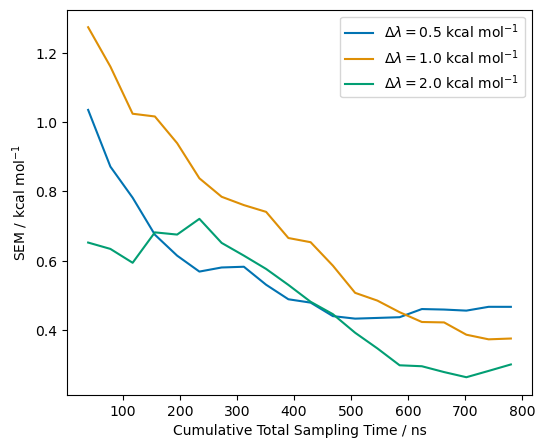

In [16]:
fig, ax = plt.subplots(figsize=(6, 5))
plot_error_conv_on_ax(overall_conv, ax)
fig.savefig("final_analysis/overall_sem_conv.png", bbox_inches="tight", dpi=300)

In [17]:
# Let's look at the per-stage error

with open("final_analysis/overall_conv_dict.pkl", "rb") as f:
    overall_conv_dict = pkl.load(f)

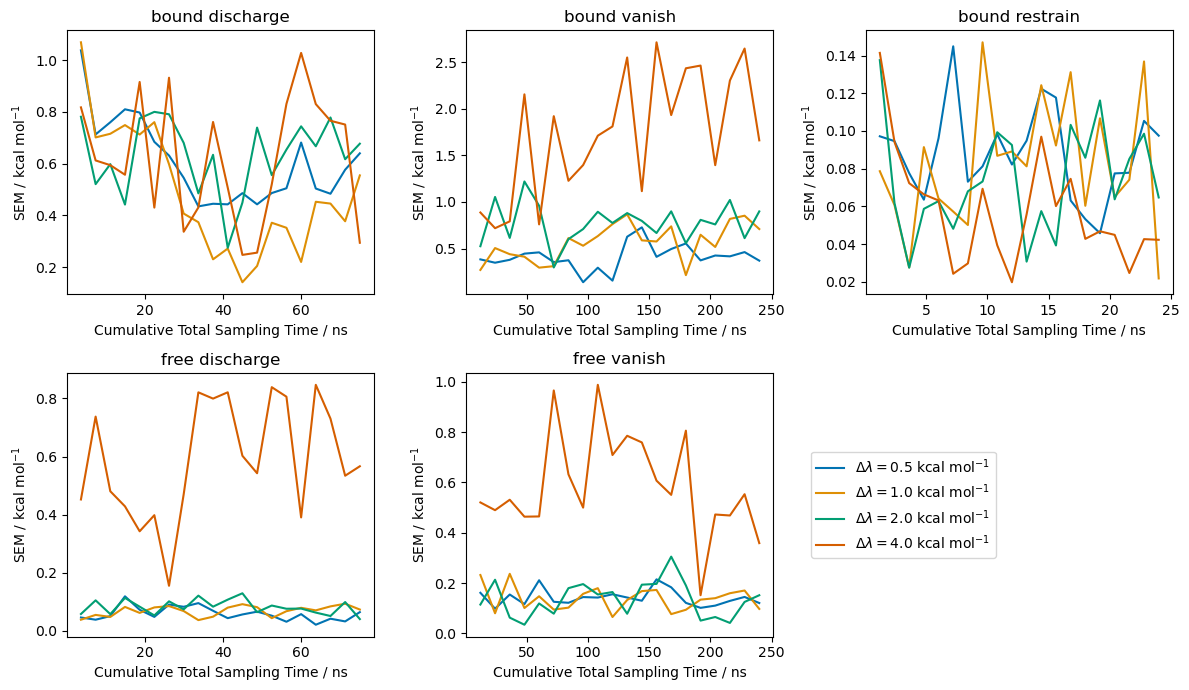

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
axs = axs.flatten()
for i, leg in enumerate(["bound", "free"]):
    stages = ["discharge", "vanish"]
    if leg == "bound":
        stages += ["restrain"]
    for j, stage in enumerate(stages):
        ax = axs[i * 3 + j]
        data = overall_conv_dict[leg][stage]
        plot_error_conv_on_ax(data, ax, cumulative=False)
        ax.set_title(f"{leg} {stage}")

# Hide the last, unused axis
axs[-1].axis("off")
fig.tight_layout()

# For all but the last axis, hide the legend. For the last axis, shift the legend to the right.
for ax in axs[:-1]:
    ax.get_legend().remove()
axs[-2].legend(loc="center left", bbox_to_anchor=(1.1, 0.5))


fig.savefig("final_analysis/per_stage_sem_conv.png", bbox_inches="tight", dpi=300)


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_862168/1836610891.py:4: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1836610891.py:5: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1836610891.py:6: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1836610891.py:7: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 4.0$ kcal mol$^{-1}$",


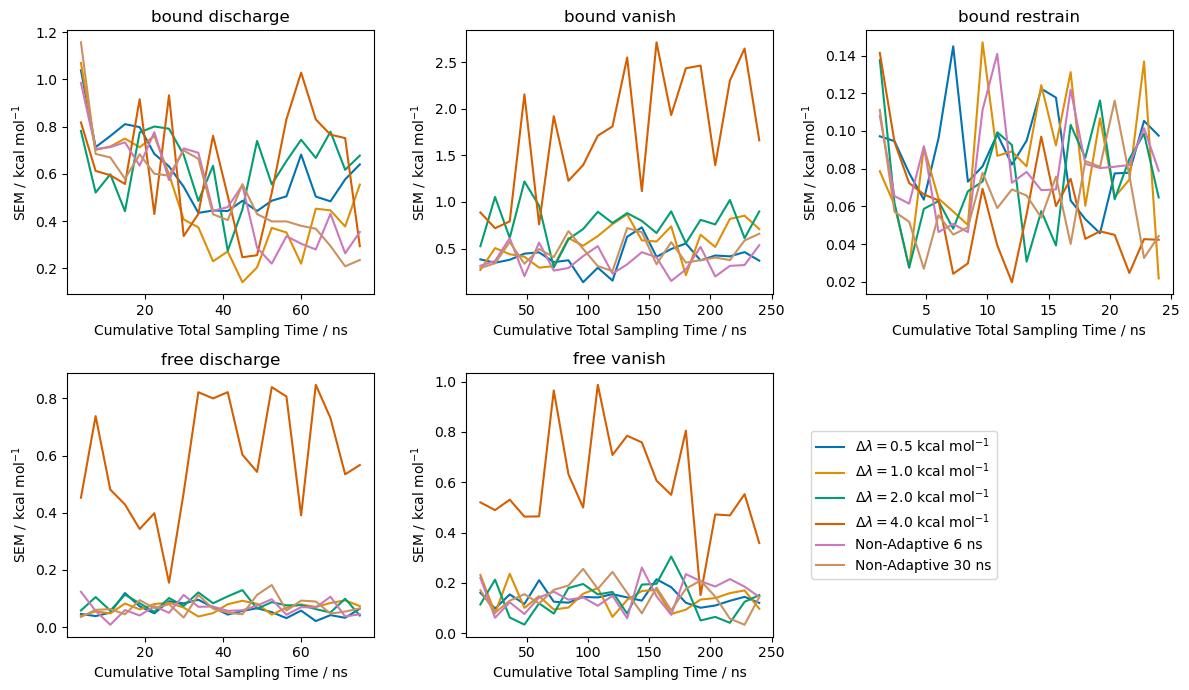

In [21]:
# Let's check out the per-stage error compared to the non-adaptively spaced simulations

labels = [
          "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
          "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
          "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
          "$\Delta \lambda = 4.0$ kcal mol$^{-1}$",
          "Non-Adaptive 6 ns",
          "Non-Adaptive 30 ns",
          ]
          
with open("final_analysis/conv_dict_incl_default_spacing.pkl", "rb") as f:
    overall_conv_dict_with_default = pkl.load(f)

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
axs = axs.flatten()
for i, leg in enumerate(["bound", "free"]):
    stages = ["discharge", "vanish"]
    if leg == "bound":
        stages += ["restrain"]
    for j, stage in enumerate(stages):
        ax = axs[i * 3 + j]
        data = overall_conv_dict_with_default[leg][stage]
        plot_error_conv_on_ax(data, ax, cumulative=False)
        ax.set_title(f"{leg} {stage}")

# Hide the last, unused axis
axs[-1].axis("off")

# Turn off legends for all plots other than last.
for ax in axs[:-2]:
    ax.get_legend().remove()

# For second last axis, move legend off to the right side.
fig.tight_layout()
axs[-2].legend(loc="center left", bbox_to_anchor=(1.1, 0.5))

fig.savefig("final_analysis/per_stage_sem_conv_with_defaults_cumulative.png", bbox_inches="tight", dpi=300)


## Look at the consistency of the overlap and number of windows

In [24]:
with open("final_analysis/overlap_mats.pkl", "rb") as f:
    overlap_mats = pkl.load(f)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_862168/1255124449.py:4: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1255124449.py:5: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1255124449.py:6: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1255124449.py:7: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 4.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1255124449.py:40: UserWarning: set_ticklabels() should only be used wi

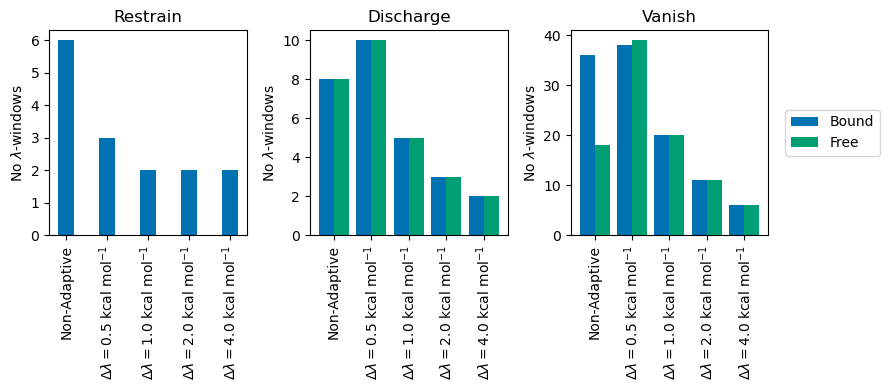

In [26]:
# Plot the number of windows used
labels = [
          "Non-Adaptive",
          "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
          "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
          "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
          "$\Delta \lambda = 4.0$ kcal mol$^{-1}$",
          ]

windows_to_plot = [
    "non_adaptive_30",
    "0.5",
    "1.0",
    "2.0",
    "4.0"
]

fig, axs = plt.subplots(1, 3, figsize=(9, 4))
axs = axs.flatten()

stages = ["restrain", "discharge", "vanish"]
for i, stage in enumerate(stages):
    ax = axs[i]
    bound_windows = {labels[i] : len(overlap_mats[name]["bound"][stage]) for i, name in enumerate(windows_to_plot)}
    if stage != "restrain":
        free_windows = {labels[i] : len(overlap_mats[name]["free"][stage]) for i, name in enumerate(windows_to_plot)}

    # Plot bars with bound on left side of each bar, and free on right
    width = 0.4
    if stage!= "restrain":
        ax.bar(np.arange(len(bound_windows)) - width/2, bound_windows.values(), width, label="Bound")
        ax.bar(np.arange(len(free_windows)) + width/2, free_windows.values(), width, label="Free")
        # Add labels to the x-axis
        ax.set_xticks(np.arange(len(bound_windows)))
        ax.set_xticklabels(bound_windows.keys())
    else:
        ax.bar(bound_windows.keys(), bound_windows.values(), width, label="Bound")
    ax.set_title(stage.capitalize())
    # Rotate x ticks 45 degrees
    ax.set_xticklabels(labels, rotation=90)
    ax.set_ylabel(r"No $\lambda$-windows")

    if i ==2:
        # Move the legend to the right
        ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))


fig.tight_layout()
fig.savefig("final_analysis/n_windows.png", bbox_inches="tight", dpi=300)
          

In [27]:
def plotOverlapMatrix(
    overlap, continuous_cbar=False, color_bar_cutoffs=[0.03, 0.1, 0.3], ax = None,
):
    """
    Plot the overlap matrix from a free-energy perturbation analysis.

    Parameters
    ----------

    overlap : List of List of float, or 2D numpy array of float
        The overlap matrix.

    continuous_cbar : bool, optional, default=False
        If True, use a continuous colour bar. Otherwise, use a discrete
        set of values defined by the 'color_bar_cutoffs' argument to
        assign a colour to each element in the matrix.

    color_bar_cutoffs : List of float, optional, default=[0.03, 0.1, 0.3]
        The cutoffs to use when assigning a colour to each element in the
        matrix. This is used for both the continuous and discrete color bars.
        Can not contain more than 3 elements.
    """

    # Validate the input
    if not isinstance(overlap, (list, tuple, np.ndarray)):
        raise TypeError(
            "The 'overlap' matrix must be a list of list types, or a numpy array!"
        )

    # Try converting to a NumPy array.
    try:
        overlap = np.array(overlap)
    except:
        raise TypeError(
            "'overlap' must be of type 'np.matrix',  'np.ndarray', or a list of lists."
        )

    # Store the number of rows.
    num_rows = len(overlap)

    # Check the data in each row.
    for row in overlap:
        if not isinstance(row, (list, tuple, np.ndarray)):
            raise TypeError("The 'overlap' matrix must be a list of list types!")
        if len(row) != num_rows:
            raise ValueError("The 'overlap' matrix must be square!")
        if not all(isinstance(x, float) for x in row):
            raise TypeError("The 'overlap' matrix must contain 'float' types!")

    # Check the colour bar options
    if not isinstance(continuous_cbar, bool):
        raise TypeError("The 'continuous_cbar' option must be a boolean!")
    if not isinstance(color_bar_cutoffs, (list, tuple, np.ndarray)):
        raise TypeError(
            "The 'color_bar_cutoffs' option must be a list of floats "
            " or a numpy array when 'continuous_cbar' is False!"
        )
    if not all(isinstance(x, float) for x in color_bar_cutoffs):
        raise TypeError("The 'color_bar_cutoffs' option must be a list of floats!")
    if len(color_bar_cutoffs) > 3:
        raise ValueError(
            "The 'color_bar_cutoffs' option must contain no more than 3 elements!"
        )

    # Add 0 and 1 to the colour bar cutoffs.
    if color_bar_cutoffs is not None:
        color_bounds = [0] + color_bar_cutoffs + [1]

    # Tuple of colours and associated font colours.
    # The last and first colours are for the top and bottom of the scale
    # for the continuous colour bar, but are ignored for the discrete bar.
    all_colors = (
        ("#FBE8EB", "black"),  # Lighter pink
        ("#FFD3E0", "black"),
        ("#88CCEE", "black"),
        ("#78C592", "black"),
        ("#117733", "white"),
        ("#004D00", "white"),
    )  # Darker green

    # Set the colour map.
    if continuous_cbar:
        # Create a color map using the extended palette and positions
        box_colors = [all_colors[i][0] for i in range(len(color_bounds) + 1)]
        cmap = colors.LinearSegmentedColormap.from_list(
            "CustomMap", list(zip(color_bounds, box_colors))
        )

        # Normalise the same way each time so that plots are always comparable.
        norm = colors.Normalize(vmin=0, vmax=1)
    else:
        # Throw away the first and last colours.
        box_colors = [colors[0] for colors in all_colors[1:-1]]
        cmap = colors.ListedColormap(
            [box_colors[i] for i in range(len(color_bounds) - 1)]
        )
        norm = colors.BoundaryNorm(color_bounds, cmap.N)

    # Create the figure and axis. Use a default size for fewer than 16 windows,
    # otherwise scale the figure size to the number of windows.
    if not ax:
        if num_rows < 16:
            fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
        else:
            fig, ax = plt.subplots(figsize=(num_rows / 2, num_rows / 2), dpi=300)

    # Create the heatmap. Separate the cells with white lines.
    im = ax.imshow(overlap, cmap=cmap, norm=norm)
    for i in range(num_rows - 1):
        for j in range(num_rows - 1):
            # Make sure these are on the edges of the cells.
            ax.axhline(i + 0.5, color="white", linewidth=0.5)
            ax.axvline(j + 0.5, color="white", linewidth=0.5)

    # Label each cell with the overlap value.
    for i in range(num_rows):
        for j in range(num_rows):
            # Get the text colour based on the overlap value.
            overlap_val = overlap[i][j]
            # Get the index of first color bound greater than the overlap value.
            for idx, bound in enumerate(color_bounds):
                if bound > overlap_val:
                    break
            text_color = all_colors[1:-1][idx - 1][1]
            # ax.text(
            #     j,
            #     i,
            #     "{:.2f}".format(overlap[i][j]),
            #     ha="center",
            #     va="center",
            #     fontsize=10,
            #     color=text_color,
            # )

    # Create a colorbar. Reduce the height of the colorbar to match the figure and remove the border.
    if continuous_cbar:
        cbar = ax.figure.colorbar(im, ax=ax, cmap=cmap, norm=norm, shrink=0.7)
    else:
        cbar = ax.figure.colorbar(
            im,
            ax=ax,
            cmap=cmap,
            norm=norm,
            boundaries=color_bounds,
            ticks=color_bounds,
            shrink=0.7,
        )
    cbar.outline.set_visible(False)

    # Set the axis labels.
    # Set the x axis at the top of the plot.
    plt.xlabel(r"$\lambda$ Index")
    ax.xaxis.set_label_position("top")
    plt.ylabel(r"$\lambda$ Index")

    ticks = [x for x in range(0, num_rows)]

    # Set ticks every lambda window.
    plt.xticks(ticks)
    ax.xaxis.tick_top()
    plt.yticks(ticks)

    # Remove the borders.
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    return ax

In [34]:
# Plot overlap matrices for the free vanish stage only for:

to_plot = [
    "non_adaptive_30",
    "0.5",
    "1.0",
    "2.0",
    "4.0"
]

labels = [
          "Non-Adaptive",
          "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
          "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
          "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
          "$\Delta \lambda = 4.0$ kcal mol$^{-1}$",
          ]


def plot_mean_overlaps(leg: str, stage: str) -> Tuple[plt.Figure, np.ndarray]:
    fig, axs = plt.subplots(3, 2, figsize=(8, 12))
    axs = axs.flatten()

    for i, spacing in enumerate(to_plot):
        ax = axs[i]
        plotOverlapMatrix(overlap_mats[spacing][leg][stage], ax=ax, continuous_cbar=True)
        ax.set_title(labels[i])

    # Hide the last, unused axis
    axs[-1].axis("off")

    # Remove the colour bar, unless it's the last axis
    for ax in axs[:-2]:
        ax.get_images()[0].colorbar.remove()

    # If it is the last axis, move the colour bar to the right,
    # but keep it around the same height as the plot
    axs[-2].get_images()[0].colorbar.remove()
    # Replot bar to the right
    cax = fig.add_axes([0.75, 0, 0.02, 0.3])
    cbar = fig.colorbar(axs[-2].get_images()[0], cax=cax)
    cbar.set_label("Overlap")

    fig.tight_layout()

    # Ensure that all tick labels are integers and that they are the same for the x and y axes
    for ax in axs:
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    return fig, axs


<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_862168/3074371760.py:13: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/3074371760.py:14: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/3074371760.py:15: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/3074371760.py:16: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 4.0$ kcal mol$^{-1}$",


/tmp/ipykernel_862168/3074371760.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


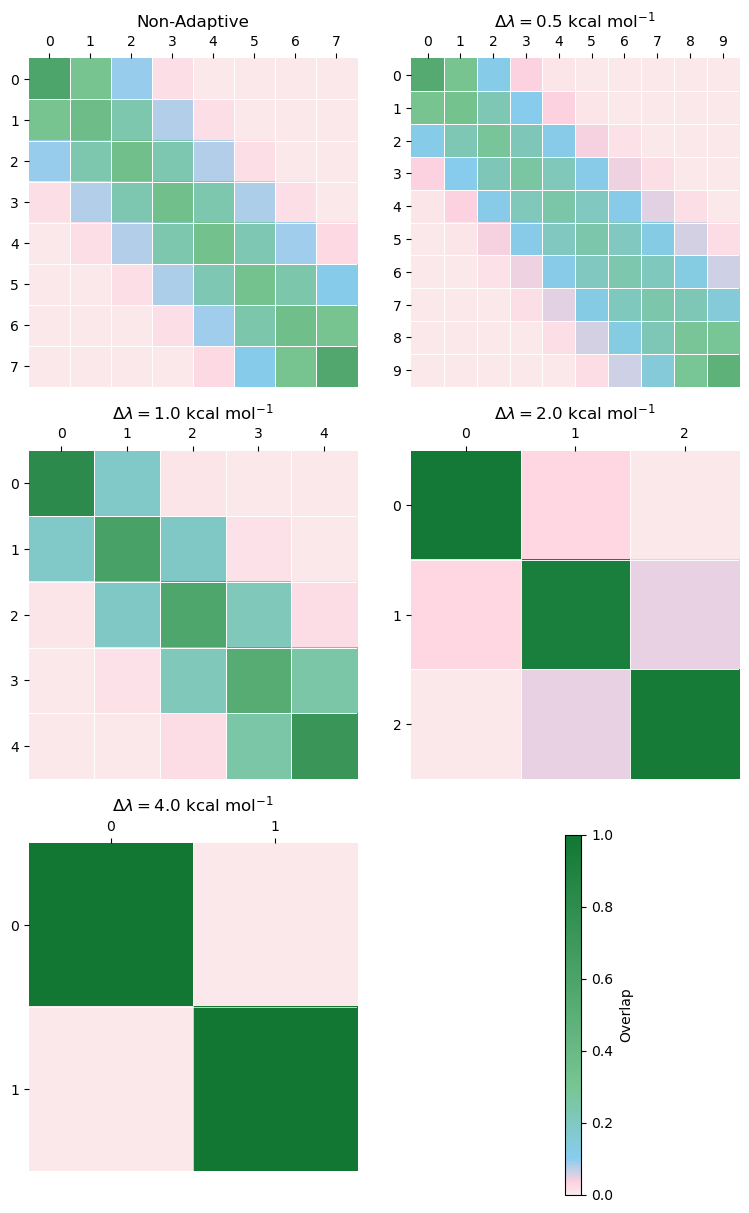

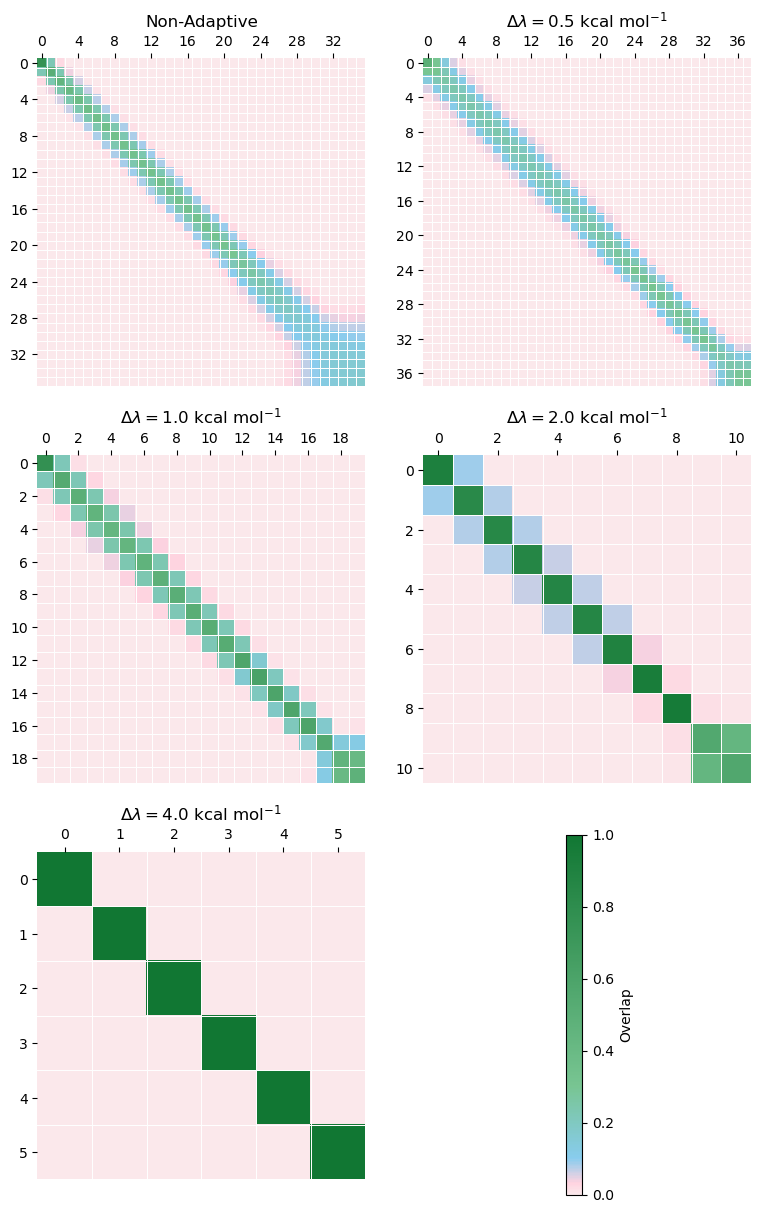

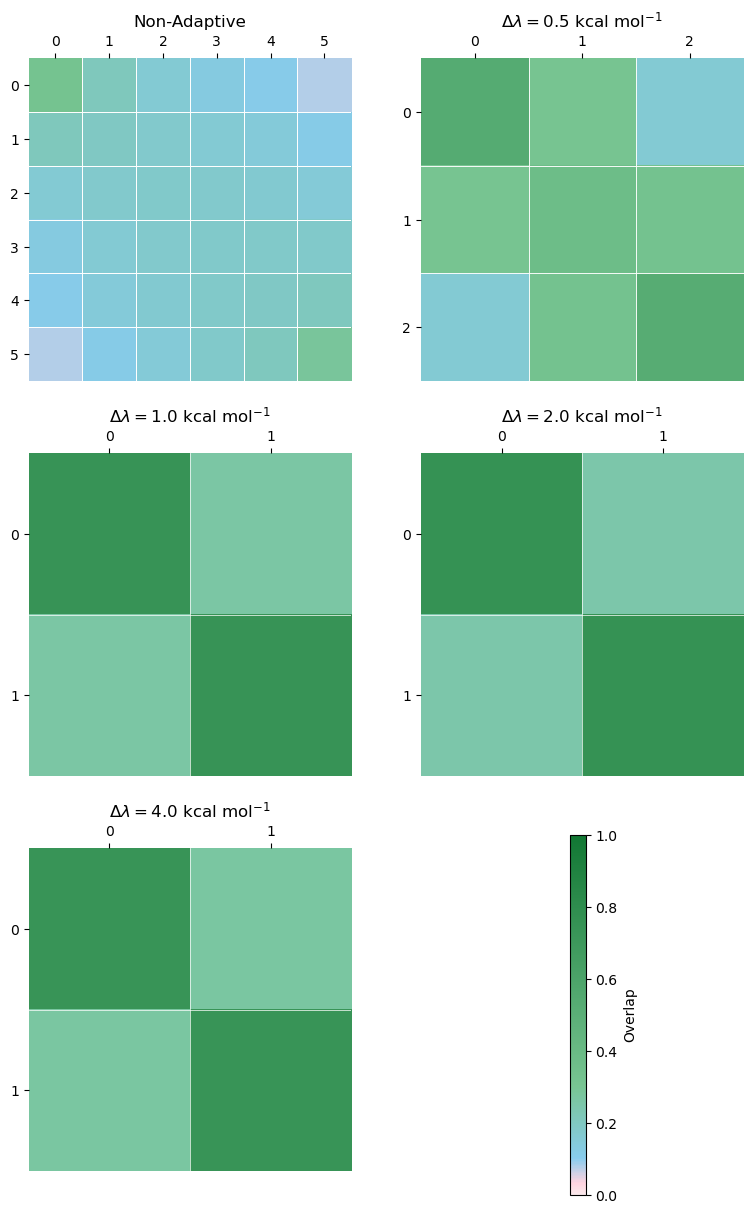

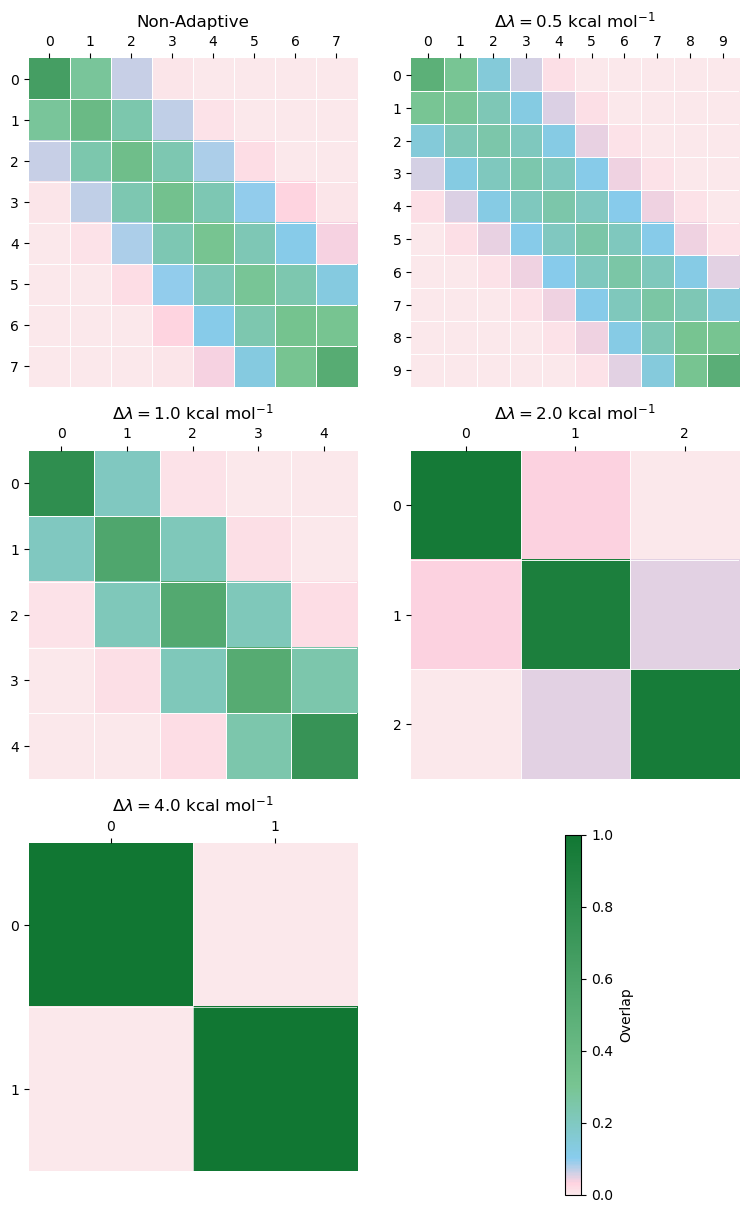

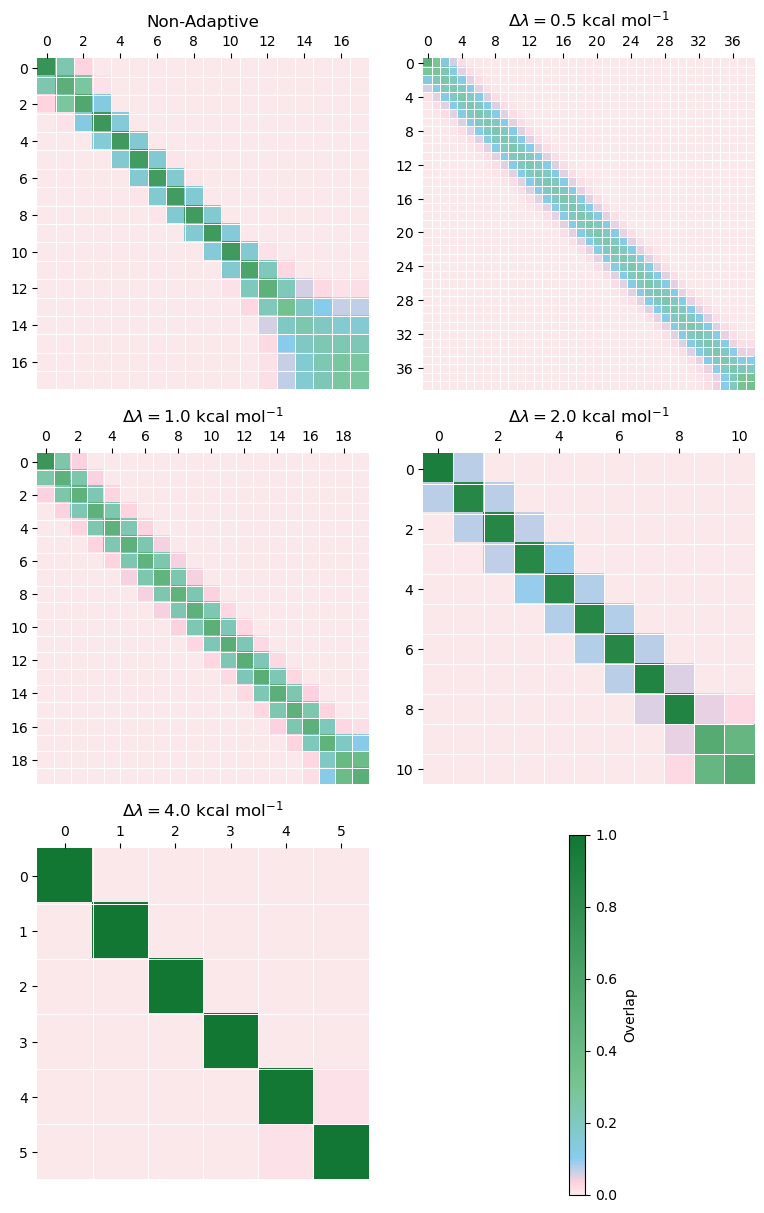

In [35]:
for leg in ["bound", "free"]:
    stages = ["discharge", "vanish"] if leg == "free" else ["discharge", "vanish", "restrain"]
    for stage in stages:
        fig, axs = plot_mean_overlaps(leg, stage)
        fig.savefig(f"final_analysis/mean_overlaps_{leg}_{stage}.png", bbox_inches="tight", dpi=300)

In [28]:
with open("final_analysis/lam_vals.pkl", "rb") as f:
    lam_vals = pkl.load(f)

In [36]:
# Let's look at the distribution of lambda values, how uniform they are, and how they change with thermodynamic speed

def plot_lambda_values(leg: str, stage: str) -> Tuple[plt.Figure, np.ndarray]:
    fig, axs = plt.subplots(3, 2, figsize=(8, 12))
    axs = axs.flatten()

    to_plot = [
        "non_adaptive_30",
        "0.5",
        "1.0",
        "2.0",
        "4.0"
    ]

    labels = [
            "Non-Adaptive",
            "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
            "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
            "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
            "$\Delta \lambda = 4.0$ kcal mol$^{-1}$",
            ]

    for i, spacing in enumerate(to_plot):
        ax = axs[i]
        lam_vals_local = lam_vals[spacing][leg][stage]
        linear = np.linspace(0, 1, len(lam_vals_local))
        ax.plot(linear, lam_vals_local, marker="o")
        ax.plot(linear, linear, linestyle="--", color="black")
        ax.set_title(labels[i])
        ax.set_xlabel("$\lambda$ index")
        ax.set_ylabel("$\lambda$ value")
        ax.text(0.65, 0.05, f"No. windows: {len(lam_vals_local)}", transform=ax.transAxes, horizontalalignment="center", verticalalignment="center")


    # Hide the last, unused axis
    axs[-1].axis("off")

    fig.tight_layout()

    return fig, axs

<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_862168/1895520011.py:17: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1895520011.py:18: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/1895520011.py:19: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
/tmp

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_862168/4138663333.py:15: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/4138663333.py:16: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
/tmp/ipykernel_862168/4138663333.py:17: SyntaxWarning: invalid escape sequence '\D'
  "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
/tmp

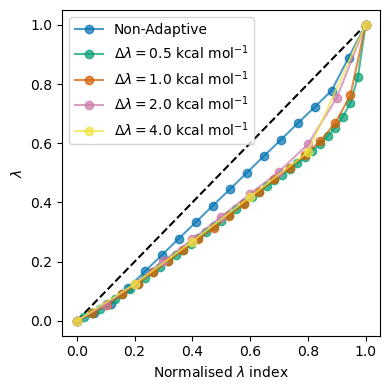

In [37]:
def plot_lambda_values_same_axis(leg: str, stage: str, fig: plt.Figure | None = None, ax: plt.Axes | None = None) -> Tuple[plt.Figure, plt.Axes]:
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    to_plot = [
        "non_adaptive_30",
        "0.5",
        "1.0",
        "2.0",
        "4.0"
    ]

    labels = [
            "Non-Adaptive",
            "$\Delta \lambda = 0.5$ kcal mol$^{-1}$",
            "$\Delta \lambda = 1.0$ kcal mol$^{-1}$",
            "$\Delta \lambda = 2.0$ kcal mol$^{-1}$",
            "$\Delta \lambda = 4.0$ kcal mol$^{-1}$",
            ]

    linear = np.linspace(0, 1, 100)
    ax.plot(linear, linear, linestyle="--", color="black")

    for i, spacing in enumerate(to_plot):
        lam_vals_local = lam_vals[spacing][leg][stage]
        linear = np.linspace(0, 1, len(lam_vals_local))
        ax.plot(linear, lam_vals_local, marker="o", label=labels[i], alpha=0.7)
        ax.set_xlabel("Normalised $\lambda$ index")
        ax.set_ylabel("$\lambda$")

    # Add legend
    ax.legend(loc="best")

    fig.tight_layout()

    return fig, axs

fig, axs = plot_lambda_values_same_axis("free", "vanish")

fig.savefig("final_analysis/mif_spacing_lambda_values_free_vanish.png", bbox_inches="tight", dpi=300)

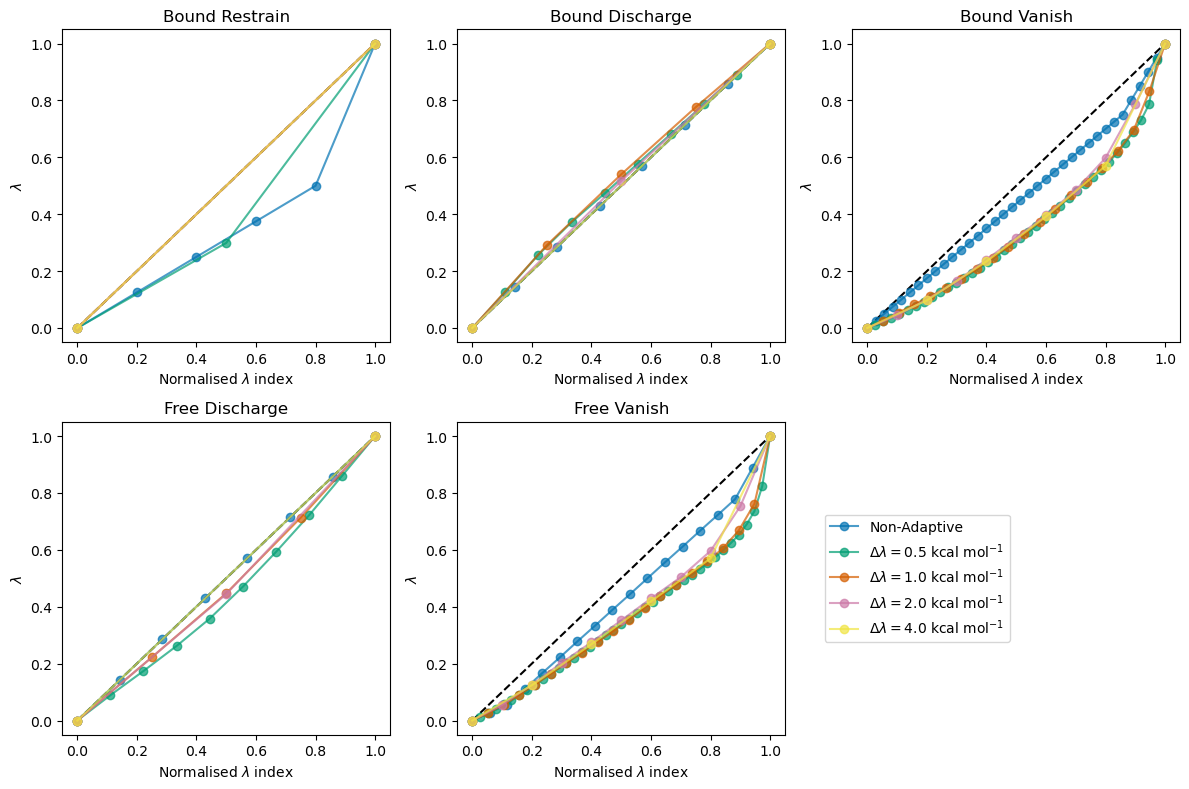

In [31]:
# Repeat above but plot for all legs and stages

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for leg in ["bound", "free"]:
    stages = ["restrain", "discharge", "vanish"] if leg == "bound" else ["discharge", "vanish"]
    for i, stage in enumerate(stages):
        index = i if leg == "bound" else i + 3
        ax = axs[index]
        ax.set_title(f"{leg.capitalize()} {stage.capitalize()}")
        fig, ax = plot_lambda_values_same_axis(leg, stage, fig=fig, ax=ax)

# Hide the last, unused axis
axs[-1].axis("off")

# Remove the legend from all but the last axis
for ax in axs[:-1]:
    ax.get_legend().remove()

# Move the legend to the right
fig.tight_layout()
axs[-2].legend(loc="center left", bbox_to_anchor=(1.1, 0.5))

fig.savefig("final_analysis/mif_spacing_lambda_distribution_all.png", bbox_inches="tight", dpi=300)